### Using XgBoost for regression

In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
Train_Data = pd.read_csv("C:/Users/Kevin Zhang/Documents/GitHub/Group20-Project/Doc/train.csv")
print(Train_Data.shape)
Test_Data = pd.read_csv("C:/Users/Kevin Zhang/Documents/GitHub/Group20-Project/Doc/test.csv")
print(Test_Data.shape)

(28734, 435)
(9581, 435)


In [3]:
Train_Y = Train_Data.pop('review_scores_rating')
print(Train_Y.shape)
Train_X = Train_Data
print(Train_X.shape)
Test_Y = Test_Data.pop('review_scores_rating')
print(Test_Y.shape)
Test_X = Test_Data
print(Test_X.shape)

(28734,)
(28734, 434)
(9581,)
(9581, 434)


In [4]:
print(Train_X.columns)
len(Train_X.columns)

Index(['Unnamed: 0', 'id', 'host_is_superhost', 'property_type_Apartment',
       'property_type_Guest suite', 'property_type_House',
       'property_type_Loft', 'property_type_Townhouse',
       'property_type_Bed and breakfast', 'property_type_Condominium',
       ...
       'neighbourhood_cleansed_Westchester Square',
       'neighbourhood_cleansed_Westerleigh',
       'neighbourhood_cleansed_Whitestone',
       'neighbourhood_cleansed_Williamsbridge',
       'neighbourhood_cleansed_Williamsburg',
       'neighbourhood_cleansed_Windsor Terrace',
       'neighbourhood_cleansed_Woodhaven', 'neighbourhood_cleansed_Woodlawn',
       'neighbourhood_cleansed_Woodrow', 'neighbourhood_cleansed_Woodside'],
      dtype='object', length=434)


434

In [5]:
Train_X.drop(['Unnamed: 0', 'id'], axis = 1, inplace = True)
print(Train_X.shape)
Test_X.drop(['Unnamed: 0', 'id'], axis = 1, inplace = True)
print(Test_X.shape)

(28734, 432)
(9581, 432)


In [6]:
XgBoost_Train = xgb.DMatrix(data = Train_X, label = Train_Y)
XgBoost_Test = xgb.DMatrix(data = Test_X, label = Test_Y)

In [7]:
params = {"objective":"reg:linear",'colsample_bytree': 1,'learning_rate': 0.05,'max_depth': 6, 'alpha': 0, 'gamma': 0,
          'min_child_weight ': 1,'subsample': 1, 'lambda': 0}

cv_results = xgb.cv(dtrain=XgBoost_Train, params=params, nfold=5, num_boost_round=500, 
                    metrics="rmse", as_pandas=True, early_stopping_rounds=True)

[22:39:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=6
[22:39:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=6
[22:39:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=6
[22:39:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=6
[22:39:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=6
[22:39:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=6
[22:39:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruni

[22:39:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=6
[22:39:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=6
[22:39:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=6
[22:39:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=6
[22:39:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=6
[22:39:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=6
[22:39:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree prun

[22:40:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=6
[22:40:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=6
[22:40:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=6
[22:40:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=6
[22:40:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=6
[22:40:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=6
[22:40:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pru

[22:40:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=6
[22:40:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=6
[22:40:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[22:40:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=6
[22:40:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=6
[22:40:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=6
[22:40:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree prunin

[22:40:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=6
[22:40:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=6
[22:40:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=6
[22:40:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=6
[22:40:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=6
[22:40:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=6
[22:40:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree prunin

[22:40:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 0 pruned nodes, max_depth=6
[22:40:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=6
[22:40:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=6
[22:40:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=6
[22:40:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=6
[22:40:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=6
[22:40:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree prun

[22:40:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=6
[22:40:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=6
[22:40:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=6
[22:40:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=6
[22:40:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=6
[22:40:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=6
[22:40:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning 

[22:40:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=6
[22:40:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 0 pruned nodes, max_depth=6
[22:40:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=6
[22:40:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=6
[22:40:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=6
[22:40:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=6
[22:40:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning

[22:40:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=6
[22:40:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=6
[22:40:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=6
[22:40:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=6
[22:40:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=6
[22:40:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=6
[22:40:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning 

[22:41:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=6
[22:41:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=6
[22:41:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=6
[22:41:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=6
[22:41:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=6
[22:41:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=6
[22:41:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning 

[22:41:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=6
[22:41:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=6


In [8]:
Min_MAE_Index = cv_results['test-rmse-mean'].idxmin()
print(cv_results.iloc[cv_results['test-rmse-mean'].idxmin()][2])
print(Min_MAE_Index)

7.440715
109


## Selection of Learning Rate

In [15]:
learning_rate_vector = [0.01, 0.03, 0.05, 0.07, 0.1, 0.2, 0.3]

In [18]:
RMAE_learning_rate = []
for i in range(len(learning_rate_vector)):
    learning_rate_current = learning_rate_vector[i]
    RMAEj = []
    for j in range(1,11):
        XgBoost_Fit = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 1, learning_rate = learning_rate_current,
                                       max_depth = 6, alpha = 0, n_estimators = Min_MAE_Index, gamma = 0, min_child_weight = 1,
                                       subsample = 1, reg_lambda = 0)
        X_Train, X_Validation, Y_Train, Y_Validation = train_test_split(Train_X, Train_Y, test_size=0.1)
        XgBoost_Fit.fit(X_Train,Y_Train)
        Preds = XgBoost_Fit.predict(X_Validation)
        RMAEj.append(np.sqrt(mean_squared_error(Y_Validation, Preds)))
    RMAE_learning_rate.append(np.mean(RMAEj))
    print("RMSE: %f" % (np.mean(RMAEj)))
Optimal_Learning_Rate = learning_rate_vector[RMAE_learning_rate.index(min(RMAE_learning_rate))]

RMSE: 32.037744
RMSE: 8.294050
RMSE: 7.452947
RMSE: 7.382062
RMSE: 7.453553
RMSE: 7.526068
RMSE: 7.767238


In [19]:
Optimal_Learning_Rate

0.07

## Selection of Max Depth

In [20]:
Max_Depth_Vector = range(1,11)

In [21]:
RMAE_Max_Depth = []
for i in range(len(Max_Depth_Vector)):
    Max_Depth_Current = Max_Depth_Vector[i]
    RMAEj = []
    for j in range(1,11):
        XgBoost_Fit = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 1, learning_rate = Optimal_Learning_Rate,
                                       max_depth = Max_Depth_Current, alpha = 0, n_estimators = Min_MAE_Index, gamma = 0, min_child_weight = 1,
                                       subsample = 1, reg_lambda = 0)
        X_Train, X_Validation, Y_Train, Y_Validation = train_test_split(Train_X, Train_Y, test_size=0.1)
        XgBoost_Fit.fit(X_Train,Y_Train)
        Preds = XgBoost_Fit.predict(X_Validation)
        RMAEj.append(np.sqrt(mean_squared_error(Y_Validation, Preds)))
    RMAE_Max_Depth.append(np.mean(RMAEj))
    print("RMSE: %f" % (np.mean(RMAEj)))
Optimal_Max_Depth = Max_Depth_Vector[RMAE_Max_Depth.index(min(RMAE_Max_Depth))]

RMSE: 7.732280
RMSE: 7.600136
RMSE: 7.234355
RMSE: 7.476236
RMSE: 7.353888
RMSE: 7.324686
RMSE: 7.501992
RMSE: 7.336886
RMSE: 7.434727
RMSE: 7.587757


In [22]:
Optimal_Max_Depth

3

## Selection of min_child_weight

In [23]:
min_child_weight_Vector = range(1,11)

In [24]:
RMAE_min_child_weight = []
for i in range(len(min_child_weight_Vector)):
    min_child_weight_Current = min_child_weight_Vector[i]
    RMAEj = []
    for j in range(1,11):
        XgBoost_Fit = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 1, learning_rate = Optimal_Learning_Rate,
                                   max_depth = Optimal_Max_Depth, alpha = 0, n_estimators = Min_MAE_Index, 
                                   min_child_weight = min_child_weight_Current, gamma = 0, subsample = 1, reg_lambda = 0)
        X_Train, X_Validation, Y_Train, Y_Validation = train_test_split(Train_X, Train_Y, test_size=0.1)
        XgBoost_Fit.fit(X_Train,Y_Train)
        Preds = XgBoost_Fit.predict(X_Validation)
        RMAEj.append(np.sqrt(mean_squared_error(Y_Validation, Preds)))
    RMAE_min_child_weight.append(np.mean(RMAEj))
    print("RMSE: %f" % (np.mean(RMAEj)))
Optimal_min_child_weight = min_child_weight_Vector[RMAE_min_child_weight.index(min(RMAE_min_child_weight))]

RMSE: 7.493263
RMSE: 7.368040
RMSE: 7.438744
RMSE: 7.348680
RMSE: 7.520274
RMSE: 7.473475
RMSE: 7.458044
RMSE: 7.630943
RMSE: 7.356024
RMSE: 7.457779


In [25]:
Optimal_min_child_weight

4

## Selection of Gamma

In [26]:
gamma_vector = [i/10.0 for i in range(0,7)]

In [27]:
RMAE_gamma = []
for i in range(len(gamma_vector)):
    gamma_Current = gamma_vector[i]
    RMAEj = []
    for j in range(1,11):
        XgBoost_Fit = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 1, learning_rate = Optimal_Learning_Rate,
                                       max_depth = Optimal_Max_Depth, alpha = 0, n_estimators = Min_MAE_Index, 
                                       min_child_weight = Optimal_min_child_weight, gamma = gamma_Current, subsample = 1, reg_lambda = 0)
        X_Train, X_Validation, Y_Train, Y_Validation = train_test_split(Train_X, Train_Y, test_size=0.1)
        XgBoost_Fit.fit(X_Train,Y_Train)
        Preds = XgBoost_Fit.predict(X_Validation)
        RMAEj.append(np.sqrt(mean_squared_error(Y_Validation, Preds)))
    RMAE_gamma.append(np.mean(RMAEj))
    print("RMSE: %f" % (np.mean(RMAEj)))
Optimal_gamma = gamma_vector[RMAE_gamma.index(min(RMAE_gamma))]

RMSE: 7.490935
RMSE: 7.631521
RMSE: 7.350068
RMSE: 7.404761
RMSE: 7.552926
RMSE: 7.426027
RMSE: 7.435423


In [28]:
Optimal_gamma

0.2

## Selection of subsample

In [29]:
subsample_vector = [i/10.0 for i in range(5,11)]

In [30]:
RMAE_subsample = []
for i in range(len(subsample_vector)):
    subsample_Current = subsample_vector[i]
    RMAEj = []
    for j in range(1,11):
        XgBoost_Fit = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 1, learning_rate = Optimal_Learning_Rate,
                                       max_depth = Optimal_Max_Depth, alpha = 0, n_estimators = Min_MAE_Index, 
                                       min_child_weight = Optimal_min_child_weight, gamma = Optimal_gamma, subsample = subsample_Current,
                                       reg_lambda = 0)
        X_Train, X_Validation, Y_Train, Y_Validation = train_test_split(Train_X, Train_Y, test_size=0.1)
        XgBoost_Fit.fit(X_Train,Y_Train)
        Preds = XgBoost_Fit.predict(X_Validation)
        RMAEj.append(np.sqrt(mean_squared_error(Y_Validation, Preds)))
    RMAE_subsample.append(np.mean(RMAEj))
    print("RMSE: %f" % (np.mean(RMAEj)))
Optimal_subsample = subsample_vector[RMAE_subsample.index(min(RMAE_subsample))]

RMSE: 7.462859
RMSE: 7.369050
RMSE: 7.491649
RMSE: 7.550122
RMSE: 7.302814
RMSE: 7.482579


In [31]:
Optimal_subsample

0.9

## Selection of colsample_bytree¶

In [32]:
colsample_bytree_vector = [i/10.0 for i in range(5,11)]

In [33]:
RMAE_colsample_bytree = []
for i in range(len(colsample_bytree_vector)):
    colsample_bytree_Current = colsample_bytree_vector[i]
    RMAEj = []
    for j in range(1,11):
        XgBoost_Fit = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = colsample_bytree_Current, 
                                       learning_rate = Optimal_Learning_Rate,
                                       max_depth = Optimal_Max_Depth, alpha = 0, n_estimators = Min_MAE_Index, 
                                       min_child_weight = Optimal_min_child_weight, gamma = Optimal_gamma, subsample = Optimal_subsample,
                                       reg_lambda = 0)
        X_Train, X_Validation, Y_Train, Y_Validation = train_test_split(Train_X, Train_Y, test_size=0.1)
        XgBoost_Fit.fit(X_Train,Y_Train)
        Preds = XgBoost_Fit.predict(X_Validation)
        RMAEj.append(np.sqrt(mean_squared_error(Y_Validation, Preds)))
    RMAE_colsample_bytree.append(np.mean(RMAEj))
    print("RMSE: %f" % (np.mean(RMAEj)))
Optimal_colsample_bytree = colsample_bytree_vector[RMAE_colsample_bytree.index(min(RMAE_colsample_bytree))]

RMSE: 7.524064
RMSE: 7.560510
RMSE: 7.483373
RMSE: 7.417237
RMSE: 7.322796
RMSE: 7.485843


In [34]:
Optimal_colsample_bytree

0.9

## Selection of alpha¶

In [35]:
alpha_vector = [0, 0.001, 0.005, 0.01, 0.05, 0.5, 1, 3, 5, 10, 50, 100]

In [36]:
RMAE_alpha = []
for i in range(len(alpha_vector)):
    alpha_Current = alpha_vector[i]
    RMAEj = []
    for j in range(1,11):
        XgBoost_Fit = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = Optimal_colsample_bytree, 
                                       learning_rate = Optimal_Learning_Rate,
                                       max_depth = Optimal_Max_Depth, alpha = alpha_Current, n_estimators = Min_MAE_Index, 
                                       min_child_weight = Optimal_min_child_weight, gamma = Optimal_gamma, subsample = Optimal_subsample,
                                       reg_lambda = 0)
        X_Train, X_Validation, Y_Train, Y_Validation = train_test_split(Train_X, Train_Y, test_size=0.1)
        XgBoost_Fit.fit(X_Train,Y_Train)
        Preds = XgBoost_Fit.predict(X_Validation)
        RMAEj.append(np.sqrt(mean_squared_error(Y_Validation, Preds)))
    RMAE_alpha.append(np.mean(RMAEj))
    print("RMSE: %f" % (np.mean(RMAEj)))
Optimal_alpha = alpha_vector[RMAE_alpha.index(min(RMAE_alpha))]

RMSE: 7.371177
RMSE: 7.504303
RMSE: 7.444582
RMSE: 7.449050
RMSE: 7.404001
RMSE: 7.317163
RMSE: 7.450887
RMSE: 7.364024
RMSE: 7.516655
RMSE: 7.393880
RMSE: 7.396364
RMSE: 7.377076


In [37]:
Optimal_alpha

0.5

## Trained XgBoost Model

params = {"objective":"reg:linear",'colsample_bytree': Optimal_colsample_bytree,'learning_rate': Optimal_Learning_Rate,
          'max_depth': Optimal_Max_Depth, 'alpha': Optimal_alpha, 'gamma': Optimal_gamma,
          'min_child_weight ': Optimal_min_child_weight,'subsample': Optimal_subsample, 'lambda': 0}

cv_results = xgb.cv(dtrain=XgBoost_Train, params=params, nfold=10, num_boost_round = 500, 
                     metrics="rmse", as_pandas=True)

Min_MAE_Index = cv_results['test-rmse-mean'].idxmin()
print(cv_results.iloc[cv_results['test-rmse-mean'].idxmin()][2])
print(Min_MAE_Index)

In [38]:
XgBoost_Fit = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = Optimal_colsample_bytree, 
                               learning_rate = Optimal_Learning_Rate,
                               max_depth = Optimal_Max_Depth, alpha = Optimal_alpha, n_estimators = Min_MAE_Index, 
                               min_child_weight = Optimal_min_child_weight, gamma = Optimal_gamma, subsample = Optimal_subsample,
                               reg_lambda = 0)
XgBoost_Fit.fit(Train_X,Train_Y)

XGBRegressor(alpha=0.5, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.9, gamma=0.2, learning_rate=0.07,
       max_delta_step=0, max_depth=3, min_child_weight=4, missing=None,
       n_estimators=109, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=0, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.9)

In [39]:
Preds = XgBoost_Fit.predict(Test_X)
print("RMSE: %f" % (np.sqrt(mean_squared_error(Preds, Test_Y))))

RMSE: 9.557016


In [40]:
np.max(Preds)

99.05843

## Feature Importance

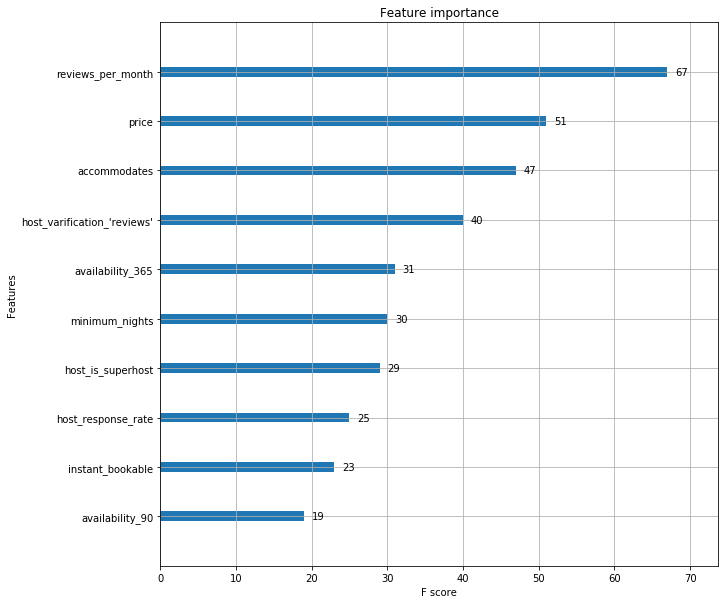

In [43]:
xgb.plot_importance(XgBoost_Fit, max_num_features = 10)
plt.rcParams['figure.figsize'] = [19, 10]
plt.show()

## Reference

Why MAE?

https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d

XgBoost

https://www.datacamp.com/community/tutorials/xgboost-in-python

Tuning Parameter for XgBoost

https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

XgBoost Website

https://xgboost.readthedocs.io/en/latest/parameter.html